# 📉 HR Attrition Analysis
## 🧾 Introduction
Employee attrition is a major challenge for companies. It impacts productivity, team morale, and financial performance. By understanding why employees leave, organizations can design more effective retention strategies and foster a healthier, more resilient workplace.
In this analysis, we’ll explore patterns in HR data to identify key drivers of attrition—and pinpoint where interventions can make the biggest difference.


## Part 1: Data Overview & Setup
We begin by importing the necessary libraries and loading the dataset.

📦 Dataset Summary:
* 1470 observations
* No missing values
* Overall attrition rate: 16%

This gives us a clean foundation for deeper analysis, where we break down attrition by role, level, workload, compensation, and more.

In [ ]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt


c:\Users\לוטם\Desktop\Data Analyst Course\Python\Connecting to SQL


In [17]:
df = pd.read_csv("full_data.csv")



In [18]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [19]:
df.isna().sum() #there are no missing values

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [13]:
# calculating attrition rate --- 16%
(df["Attrition"] == 'Yes').mean()

np.float64(0.16122448979591836)

In [14]:
df["Department"] = df["Department"].replace({
    "Research & Development": "R&D",
    "Human Resources": "HR"
})


## Part 2: Where Is Attrition Happening? (Roles, Levels & Tenure)
This section sets the stage: which kinds of employees are leaving the organization?
### 2.1. Attrition by Department

The Sales department has the highest attrition rate at 20.6%, followed by HR (19.0%). In contrast, R&D sees lower attrition at 13.8%. This suggests that customer-facing and people-management roles may carry more pressure, stress, or fewer growth opportunities than technical roles.

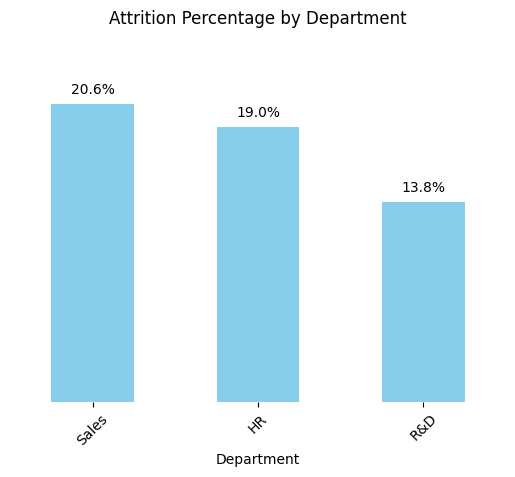

In [15]:
# calculating attrition rate accross departments
# Calculate attrition percentage for each department
attrition_by_dept = df.groupby('Department')['Attrition'].apply(lambda x: (x == 'Yes').mean() * 100)

# Sort departments from highest to lowest attrition percentage
attrition_by_dept = attrition_by_dept.sort_values(ascending=False)

# Plot the bar chart
attrition_by_dept.plot(kind='bar', color='skyblue')
plt.ylabel('Attrition Percentage (%)')
plt.title('Attrition Percentage by Department')
plt.xticks(rotation=45)
plt.ylim(0, attrition_by_dept.max() + 5)
# Add percentage labels above each bar
for i, v in enumerate(attrition_by_dept):
    plt.text(i, v + 0.5, f"{v:.1f}%", ha='center', va='bottom', fontsize=10)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().axes.get_yaxis().set_visible(False)

plt.show()

### 2.2. Attrition by Job Role
This view breaks down department-level attrition into specific positions:
Sales Representatives have the highest attrition at 39.8%.
In R&D, turnover is higher among Lab Technicians (23.9%) and Research Scientists (16.1%) than senior roles.
In HR, general staff show 23.1% attrition, while Managers show none.


Across all departments, managerial roles exhibit very low attrition, indicating strong retention at leadership levels.


🔍 Insight: Frontline employees, especially in Sales and R&D, are more likely to leave than those in leadership. This underscores the vulnerability of high-stress, lower-autonomy roles.

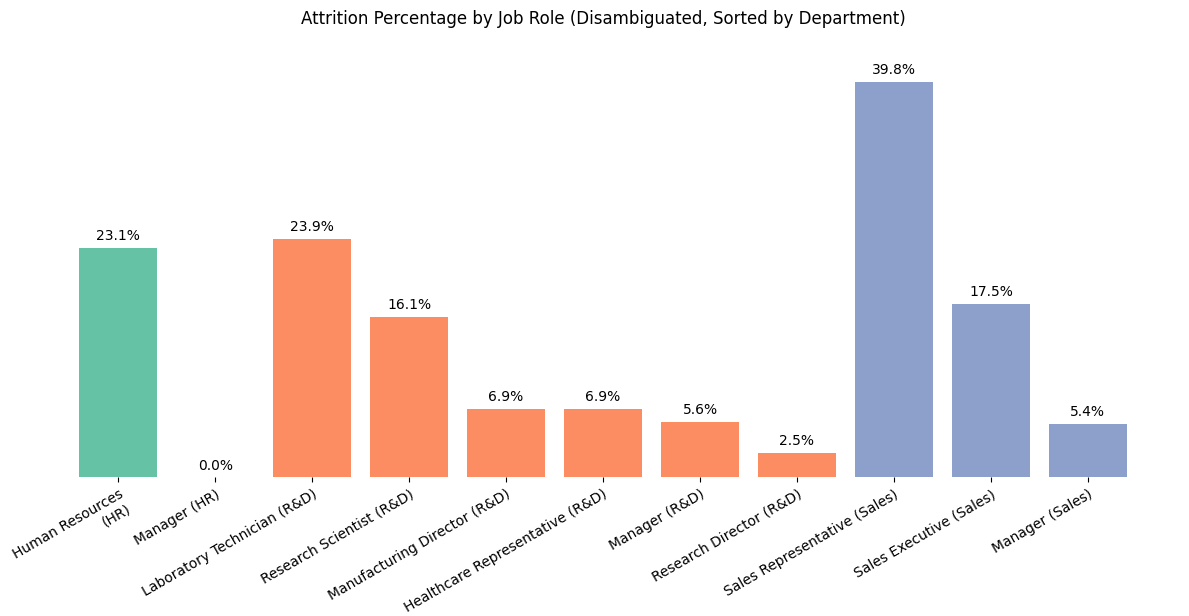

In [16]:
# Calculate attrition percentage for each job role, and get their departments
jobrole_attrition = (
    df.groupby(['Department', 'JobRole'])['Attrition']
    .apply(lambda x: (x == 'Yes').mean() * 100)
    .reset_index()
    .rename(columns={'Attrition': 'AttritionRate'})
)

# Disambiguate duplicate job role names by appending department
# e.g., "Manager (Sales)", "Manager (Research & Development)"
jobrole_attrition['JobRoleLabel'] = (
    jobrole_attrition['JobRole'] + " (" + jobrole_attrition['Department'] + ")"
)

# Sort by Department (alphabetically), then by attrition rate descending within each department
jobrole_attrition = jobrole_attrition.sort_values(['Department', 'AttritionRate'], ascending=[True, False])

import matplotlib.pyplot as plt

# Assign a color to each department (optional: use a single color since legend is removed)
departments = jobrole_attrition['Department'].unique()
palette = plt.get_cmap('Set2')
dept_colors = {dept: palette(i) for i, dept in enumerate(departments)}
bar_colors = jobrole_attrition['Department'].map(dept_colors)

# Plot
fig, ax = plt.subplots(figsize=(max(12, 0.7*len(jobrole_attrition)), 6))  # Wider if many roles
bars = ax.bar(
    jobrole_attrition['JobRoleLabel'],
    jobrole_attrition['AttritionRate'],
    color=bar_colors
)

# Add percentage labels above each bar
for i, v in enumerate(jobrole_attrition['AttritionRate']):
    ax.text(i, v + 0.5, f"{v:.1f}%", ha='center', va='bottom', fontsize=10, rotation=0)

# Set labels and title
ax.set_ylabel('Attrition Percentage (%)')
ax.set_title('Attrition Percentage by Job Role (Disambiguated, Sorted by Department)')
ax.set_xticks(range(len(jobrole_attrition)))
ax.set_xticklabels(
    jobrole_attrition['JobRoleLabel'],
    rotation=30,
    ha='right',
    fontsize=10,
    wrap=True
)
ax.set_ylim(0, jobrole_attrition['AttritionRate'].max() + 5)

# Remove spines and y-axis
for spine in ['top', 'right', 'left', 'bottom']:
    ax.spines[spine].set_visible(False)
ax.get_yaxis().set_visible(False)

# No legend

plt.tight_layout()
plt.show()

### 2.3. Attrition by Job Level
After seeing high turnover in entry-level roles like Sales Representatives, we find this trend reinforced when viewed by job level:
Job Level 1 employees have the highest attrition (26.3%), capturing early-career staff.
Attrition drops steadily with seniority, reaching 4.7% at Level 4 and 7.2% at Level 5, where leadership positions are concentrated.

🔍 Insight: Seniority is strongly linked to retention. Early-career staff face more instability or unmet expectations, while established leaders tend to stay.

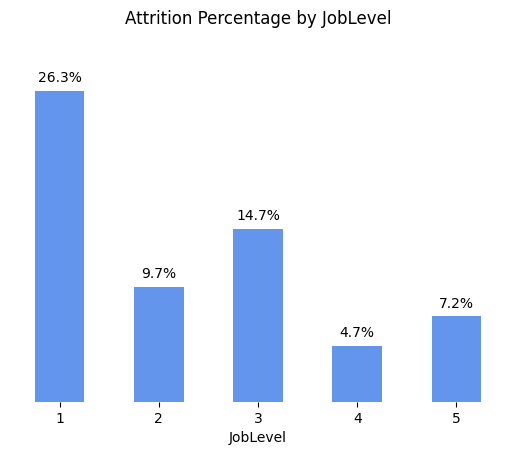

In [19]:
# Calculating attrition rate across JobLevel categories
# Calculate attrition percentage for each JobLevel
attrition_by_joblevel = df.groupby('JobLevel')['Attrition'].apply(lambda x: (x == 'Yes').mean() * 100)

# Sort JobLevel levels by their values (1 to 5, left to right)
attrition_by_joblevel = attrition_by_joblevel.sort_index()

# Plot the bar chart
attrition_by_joblevel.plot(kind='bar', color='cornflowerblue')
plt.ylabel('Attrition Percentage (%)')
plt.title('Attrition Percentage by JobLevel')
plt.xticks(rotation=0)
plt.ylim(0, attrition_by_joblevel.max() + 5)
# Add percentage labels above each bar
for i, v in enumerate(attrition_by_joblevel):
    plt.text(i, v + 0.5, f"{v:.1f}%", ha='center', va='bottom', fontsize=10)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().axes.get_yaxis().set_visible(False)

plt.show()

### 🧠 Connecting Insight: 
Early-career, customer-facing, and non-managerial employees face the highest attrition—especially within the first few years. These roles require the most structured support, development, and retention focus.






## Part 3: Why Are Employees Leaving? (Stress, Balance & Culture)
This section examines how day-to-day working conditions impact attrition.



### 3.1. Attrition by OverTime
Employees who work overtime are three times more likely to leave (30.5%) than those who don’t (10.4%). This strongly suggests that overwork and burnout are driving dissatisfaction.


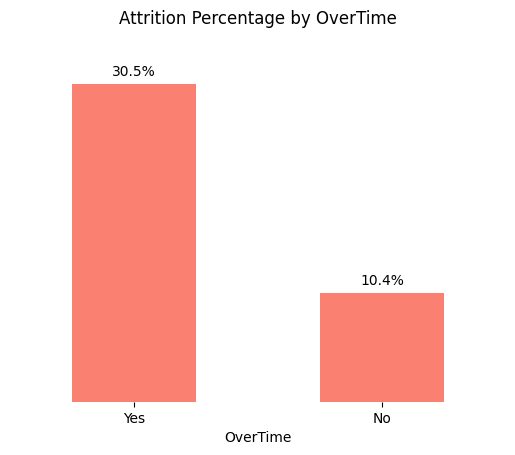

In [17]:
# Calculating attrition rate across OverTime categories
# Calculate attrition percentage for each OverTime category
attrition_by_overtime = df.groupby('OverTime')['Attrition'].apply(lambda x: (x == 'Yes').mean() * 100)

# Sort OverTime categories from highest to lowest attrition percentage
attrition_by_overtime = attrition_by_overtime.sort_values(ascending=False)

# Plot the bar chart
attrition_by_overtime.plot(kind='bar', color='salmon')
plt.ylabel('Attrition Percentage (%)')
plt.title('Attrition Percentage by OverTime')
plt.xticks(rotation=0)
plt.ylim(0, attrition_by_overtime.max() + 5)
# Add percentage labels above each bar
for i, v in enumerate(attrition_by_overtime):
    plt.text(i, v + 0.5, f"{v:.1f}%", ha='center', va='bottom', fontsize=10)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().axes.get_yaxis().set_visible(False)

plt.show()

### 3.2. Attrition by Work-Life Balance
Employees with the lowest work-life balance rating (1) show the highest attrition (31.2%)- almost double the average. Interestingly, scores of 2, 3, and 4 cluster between 14%–17%, with no clear improvement as scores rise past 2.

🔍Insight: Employees with the poorest work-life balance are much more likely to leave. Focused efforts to support these employees—through flexible scheduling, reasonable workload expectations, or wellness programs- could yield high returns in retention.

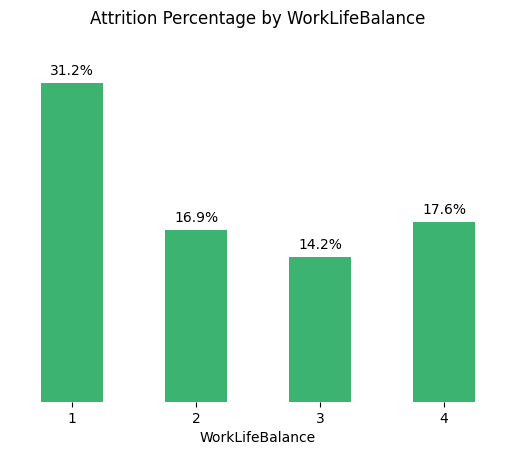

In [27]:
# Calculating attrition rate across WorkLifeBalance categories
# Calculate attrition percentage for each WorkLifeBalance level
attrition_by_worklifebalance = df.groupby('WorkLifeBalance')['Attrition'].apply(lambda x: (x == 'Yes').mean() * 100)

# Sort WorkLifeBalance levels by their values (1 to 4, left to right)
attrition_by_worklifebalance = attrition_by_worklifebalance.sort_index()

# Plot the bar chart
attrition_by_worklifebalance.plot(kind='bar', color='mediumseagreen')
plt.ylabel('Attrition Percentage (%)')
plt.title('Attrition Percentage by WorkLifeBalance')
plt.xticks(rotation=0)
plt.ylim(0, attrition_by_worklifebalance.max() + 5)
# Add percentage labels above each bar
for i, v in enumerate(attrition_by_worklifebalance):
    plt.text(i, v + 0.5, f"{v:.1f}%", ha='center', va='bottom', fontsize=10)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().axes.get_yaxis().set_visible(False)

plt.show()

### 3.3. Attrition by Relationship Satisfaction
Employees who rated their relationships the lowest (score 1) show 20.7% attrition, while scores 2- 4 hover around 15%. Poor interpersonal dynamics- whether with peers or managers- are a strong predictor of churn.

🔍 Insight: Team culture and manager-employee relationships significantly affect retention. Interpersonal support should be seen as a retention tool.


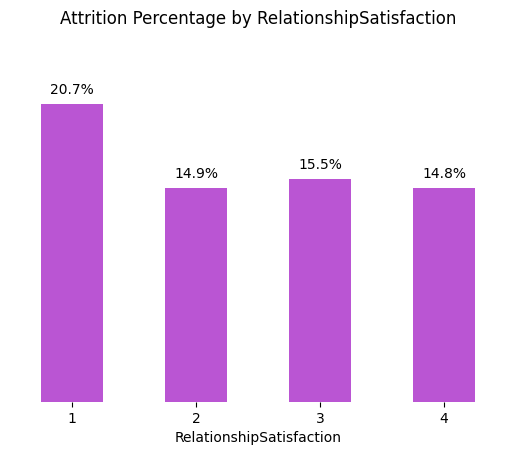

In [20]:
# Calculating attrition rate across RelationshipSatisfaction categories
# Calculate attrition percentage for each RelationshipSatisfaction level
attrition_by_relationship = df.groupby('RelationshipSatisfaction')['Attrition'].apply(lambda x: (x == 'Yes').mean() * 100)

# Sort RelationshipSatisfaction levels by their values (typically 1 to 4, left to right)
attrition_by_relationship = attrition_by_relationship.sort_index()

# Plot the bar chart
attrition_by_relationship.plot(kind='bar', color='mediumorchid')
plt.ylabel('Attrition Percentage (%)')
plt.title('Attrition Percentage by RelationshipSatisfaction')
plt.xticks(rotation=0)
plt.ylim(0, attrition_by_relationship.max() + 5)
# Add percentage labels above each bar
for i, v in enumerate(attrition_by_relationship):
    plt.text(i, v + 0.5, f"{v:.1f}%", ha='center', va='bottom', fontsize=10)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().axes.get_yaxis().set_visible(False)

plt.show()

### 🧠 Connecting Insight: 
Employees are more likely to leave when experiencing workload pressure, poor balance, or strained relationships. These are all areas where managerial behavior and policy can directly reduce attrition.


## Part 4: What Makes People Stay? (Pay, Perks & Progression)
These factors anchor employees to the company- financially and professionally.
### Attrition by Stock Option Level
Employees with no stock options face the highest attrition (24.4%), while those at levels 1 and 2 show significantly lower rates (9.4% and 7.6%). Interestingly, level 3 sees attrition rise again to 17.6%, possibly reflecting new stressors or higher expectations at that tier.

🔍 Insight: Offering stock options- especially at moderate levels- can be a strong retention tool. However, equity alone isn't enough at the high end.


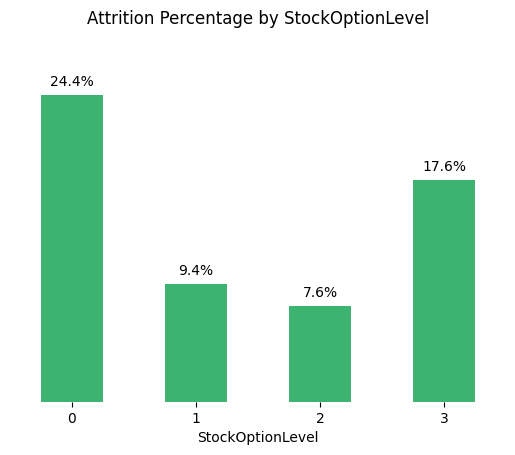

In [21]:
# Calculating attrition rate across StockOptionLevel categories
# Calculate attrition percentage for each StockOptionLevel
attrition_by_stockoption = df.groupby('StockOptionLevel')['Attrition'].apply(lambda x: (x == 'Yes').mean() * 100)

# Sort StockOptionLevel by their values (typically 0 to 3, left to right)
attrition_by_stockoption = attrition_by_stockoption.sort_index()

# Plot the bar chart
attrition_by_stockoption.plot(kind='bar', color='mediumseagreen')
plt.ylabel('Attrition Percentage (%)')
plt.title('Attrition Percentage by StockOptionLevel')
plt.xticks(rotation=0)
plt.ylim(0, attrition_by_stockoption.max() + 5)
# Add percentage labels above each bar
for i, v in enumerate(attrition_by_stockoption):
    plt.text(i, v + 0.5, f"{v:.1f}%", ha='center', va='bottom', fontsize=10)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().axes.get_yaxis().set_visible(False)

plt.show()

### 4.2. Attrition by Monthly Income
Leavers earn significantly less than those who stay:
Leavers' median income: $3,202


Stayers' median income: $5,204


Mean income gap: $4,787 vs. $6,833


🔍 Insight: Compensation is one of the clearest differentiators between leavers and stayers. Pay transparency and competitive packages are essential.


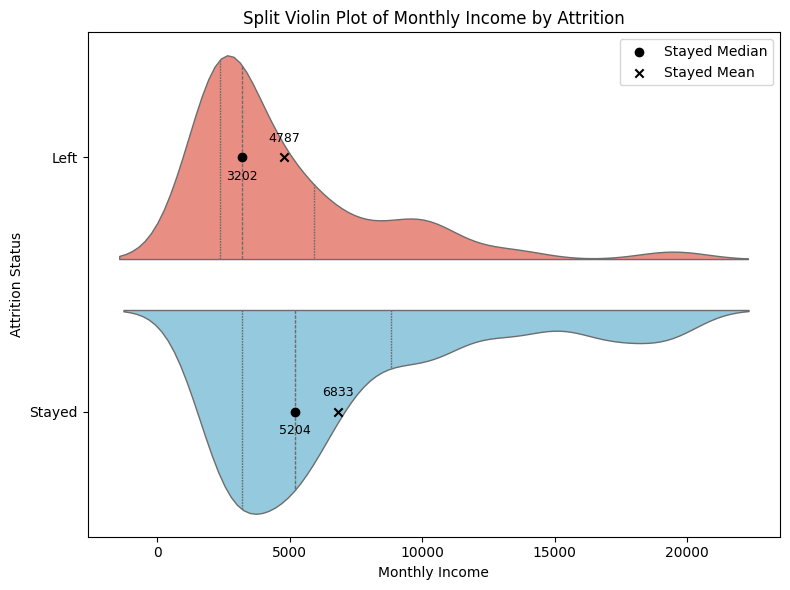

In [24]:
# Impact of MonthlyIncome

# Prepare data for MonthlyIncome distribution across Attrition
df_violin_mi = df[['Attrition', 'MonthlyIncome']].copy()
df_violin_mi['Attrition'] = df_violin_mi['Attrition'].map({'Yes': 'Left', 'No': 'Stayed'})

plt.figure(figsize=(8, 6))

# Violin plot with split for MonthlyIncome
sns.violinplot(
    data=df_violin_mi,
    x='MonthlyIncome',
    y='Attrition',
    hue='Attrition',
    split=True,
    inner='quartile',
    palette={'Left': 'salmon', 'Stayed': 'skyblue'},
    linewidth=1
)

# Show medians and means for each group
for i, status in enumerate(['Stayed', 'Left']):
    group = df_violin_mi[df_violin_mi['Attrition'] == status]['MonthlyIncome']
    median = group.median()
    mean = group.mean()

    y_pos = 0 if status == 'Left' else 1  # 0 = bottom ('Left'), 1 = top ('Stayed')
    plt.scatter(median, y_pos, color='black', marker='o', zorder=3, label=f'{status} Median' if i==0 else "")
    plt.scatter(mean, y_pos, color='black', marker='x', zorder=3, label=f'{status} Mean' if i==0 else "")
    plt.text(median, y_pos + 0.1, f'{median:.0f}', ha='center', va='bottom', fontsize=9, color='black')
    plt.text(mean, y_pos - 0.1, f'{mean:.0f}', ha='center', va='top', fontsize=9, color='black')

plt.xlabel('Monthly Income')
plt.ylabel('Attrition Status')
plt.title('Split Violin Plot of Monthly Income by Attrition')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

### 🧠Connecting Insight: 
Employees who feel financially undervalued or don’t receive meaningful incentives are more likely to leave. Rewards and recognition- through both salary and equity- are key to building long-term retention.


## Part 5: Secondary Factors Worth Monitoring (But Not Core Drivers)
These don’t explain attrition on their own, but add useful context when combined with other variables.
### 5.1. Attrition by Distance from Home
Leavers live slightly farther from work than stayers (median 9 km vs. 7 km). While not dramatic, long commutes can amplify other sources of dissatisfaction, such as overtime or burnout.

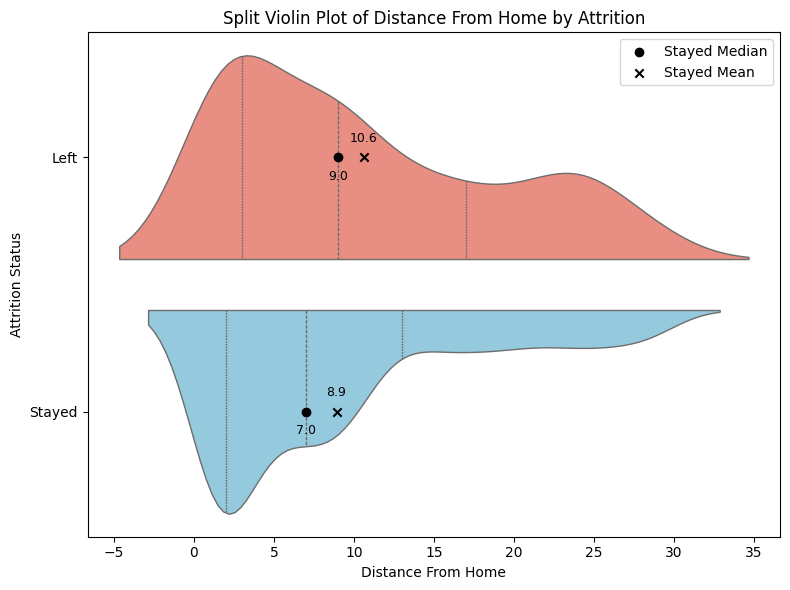

In [29]:
# Impact of distance from home
# Prepare data
df_violin = df[['Attrition', 'DistanceFromHome']].copy()
df_violin['Attrition'] = df_violin['Attrition'].map({'Yes': 'Left', 'No': 'Stayed'})

plt.figure(figsize=(8, 6))

# Violin plot with split
sns.violinplot(
    data=df_violin,
    x='DistanceFromHome',
    y='Attrition',
    hue='Attrition',
    split=True,
    inner='quartile',
    palette={'Left': 'salmon', 'Stayed': 'skyblue'},
    linewidth=1
)

# Fixing medians and means to appear on the correct side
for i, status in enumerate(['Stayed', 'Left']):
    group = df_violin[df_violin['Attrition'] == status]['DistanceFromHome']
    median = group.median()
    mean = group.mean()

    # Use scatter to show median and mean on correct side (slightly shifted on y-axis)
    y_pos = 0 if status == 'Left' else 1  # 0 = bottom ('Left'), 1 = top ('Stayed')
    
    plt.scatter(median, y_pos, color='black', marker='o', zorder=3, label=f'{status} Median' if i==0 else "")
    plt.scatter(mean, y_pos, color='black', marker='x', zorder=3, label=f'{status} Mean' if i==0 else "")
    
    # Annotate values
    plt.text(median, y_pos + 0.1, f'{median:.1f}', ha='center', va='bottom', fontsize=9, color='black')
    plt.text(mean, y_pos - 0.1, f'{mean:.1f}', ha='center', va='top', fontsize=9, color='black')

# Styling
plt.xlabel('Distance From Home')
plt.ylabel('Attrition Status')
plt.title('Split Violin Plot of Distance From Home by Attrition')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

### 5.2. Attrition by Age
Leavers are slightly younger (median age 32 vs. 36), but the distributions heavily overlap. Age seems to act as a proxy for experience or tenure, rather than a causal factor.



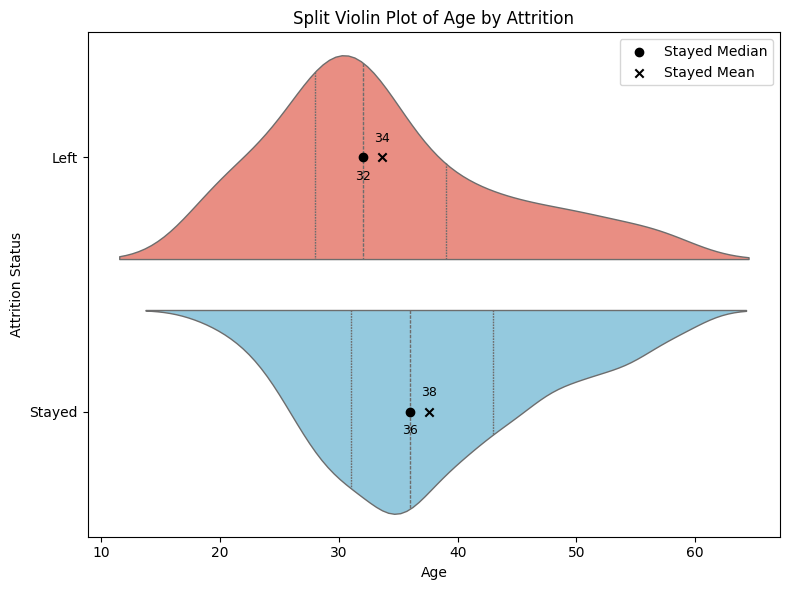

In [30]:
# Impact of age
# Prepare data for Age distribution across Attrition
df_violin_age = df[['Attrition', 'Age']].copy()
df_violin_age['Attrition'] = df_violin_age['Attrition'].map({'Yes': 'Left', 'No': 'Stayed'})

plt.figure(figsize=(8, 6))

# Violin plot with split for Age
sns.violinplot(
    data=df_violin_age,
    x='Age',
    y='Attrition',
    hue='Attrition',
    split=True,
    inner='quartile',
    palette={'Left': 'salmon', 'Stayed': 'skyblue'},
    linewidth=1
)

# Show medians and means for each group
for i, status in enumerate(['Stayed', 'Left']):
    group = df_violin_age[df_violin_age['Attrition'] == status]['Age']
    median = group.median()
    mean = group.mean()

    y_pos = 0 if status == 'Left' else 1  # 0 = bottom ('Left'), 1 = top ('Stayed')
    plt.scatter(median, y_pos, color='black', marker='o', zorder=3, label=f'{status} Median' if i==0 else "")
    plt.scatter(mean, y_pos, color='black', marker='x', zorder=3, label=f'{status} Mean' if i==0 else "")
    plt.text(median, y_pos + 0.1, f'{median:.0f}', ha='center', va='bottom', fontsize=9, color='black')
    plt.text(mean, y_pos - 0.1, f'{mean:.0f}', ha='center', va='top', fontsize=9, color='black')

plt.xlabel('Age')
plt.ylabel('Attrition Status')
plt.title('Split Violin Plot of Age by Attrition')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()